#Supervised Machine Learning: Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier

from sklearn.impute import KNNImputer

from sklearn.ensemble import RandomForestClassifier


house = pd.read_csv("https://raw.githubusercontent.com/icaromisquita/archives/main/housing_prices_iter7.csv")
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [2]:
print(house. columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

###Removing the "SalePrice" column from the Dataframe as it is the variable we want to predict (y value) 

In [3]:
y= house["SalePrice"]
X = house
X = X.drop(columns="SalePrice")

# data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)
X_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1446,1447,20,RL,NaN,26142,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
1123,1124,20,RL,50.0,9405,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
186,187,80,RL,NaN,9947,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,GdPrv,NaN,0,6,2009,WD,Normal
1020,1021,20,RL,60.0,7024,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2008,WD,Normal
67,68,20,RL,72.0,10665,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal


In [4]:
X.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
Length: 80, dtype: int64

###Dummy model

##1st iteration: dummy model and linear regression + regression errors

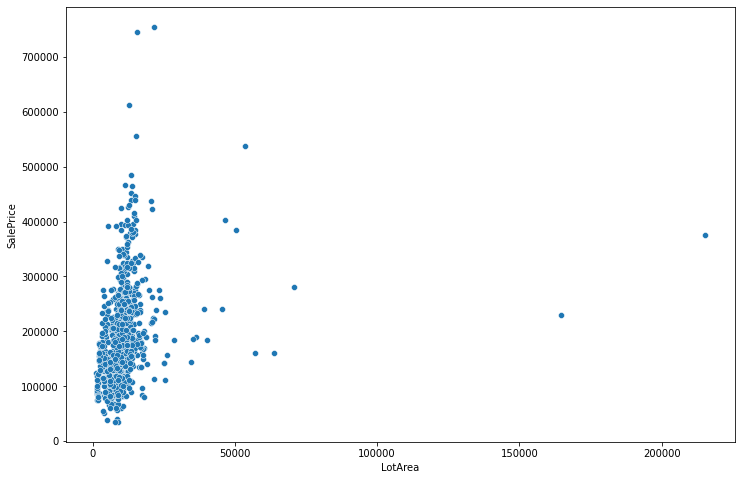

In [5]:
plt.subplots(figsize=(12, 8))
sns.scatterplot(x=X_train['LotArea'], y=y_train)
plt.show()

Based on the graph below I am going to create a real simple model:

$$
SalePrice = LotArea*24.5
$$

For each meter an increase of 24.5 was observed

In [6]:
def my_dummy_model(LotArea): 
    return LotArea * 24.5

dummy_model_res = (
X_train
    .assign(
        preds = lambda x: my_dummy_model(x['LotArea']), 
        price = y_train
        )
    .assign(
        error = lambda x:  x['preds'] - x['price']
    )
)
dummy_model_res

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,preds,price,error
1446,1447,20,RL,NaN,26142,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,4,2010,WD,Normal,640479.0,157900,482579.0
1123,1124,20,RL,50.0,9405,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,6,2009,WD,Normal,230422.5,118000,112422.5
186,187,80,RL,NaN,9947,Pave,NaN,IR1,Lvl,AllPub,...,GdPrv,NaN,0,6,2009,WD,Normal,243701.5,173000,70701.5
1020,1021,20,RL,60.0,7024,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,6,2008,WD,Normal,172088.0,176000,-3912.0
67,68,20,RL,72.0,10665,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,6,2007,WD,Normal,261292.5,226000,35292.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1041,1042,60,RL,NaN,9130,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,7,2008,WD,Normal,223685.0,173000,50685.0
1122,1123,20,RL,NaN,8926,Pave,NaN,IR1,Lvl,AllPub,...,MnPrv,NaN,0,10,2009,COD,Abnorml,218687.0,112000,106687.0
1346,1347,20,RL,NaN,20781,Pave,NaN,IR2,Lvl,AllPub,...,NaN,NaN,0,6,2006,WD,Normal,509134.5,262500,246634.5
1406,1407,85,RL,70.0,8445,Pave,NaN,Reg,Lvl,AllPub,...,MnPrv,NaN,0,3,2009,WD,Normal,206902.5,133000,73902.5


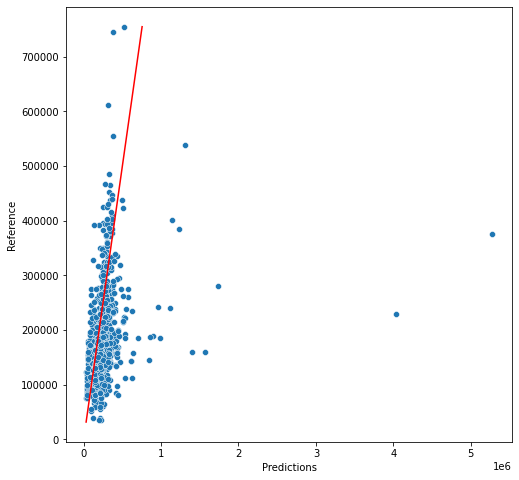

In [7]:
def plot_predictions(y_true, y_pred): 
    max_preds = min([max(y_pred.tolist()), max(y_true.tolist())])
    min_preds = min([min(y_pred.tolist()), min(y_true.tolist())])
    # plot
    plt.figure(figsize=(8,8))
    sns.scatterplot(x=y_pred, y=y_true)
    sns.lineplot(x=[min_preds,max_preds], y=[min_preds, max_preds], color='red')
    plt.ylabel('Reference')
    plt.xlabel('Predictions')
    plt.show()

plot_predictions(dummy_model_res['price'], dummy_model_res['preds'])

### Creating our first Linear Model

In [8]:
np.array(X_train['LotArea']).reshape(-1, 1)

array([[26142],
       [ 9405],
       [ 9947],
       ...,
       [20781],
       [ 8445],
       [ 6000]])

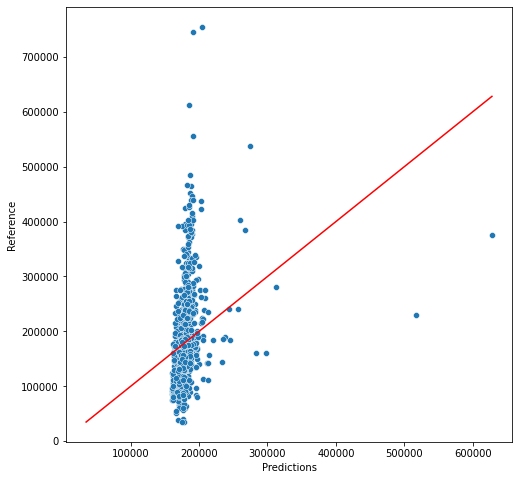

In [9]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(np.array(X_train['LotArea']).reshape(-1, 1), y_train)
plot_predictions(y_train, lm.predict(np.array(X_train['LotArea']).reshape(-1, 1)))

In [10]:
print(
    lm.coef_, 
    lm.intercept_
    )

[2.18541498] 157693.64087456334


Linear model: 

$$
price = 157693.64087456334 + LotArea * 2.18541498
$$

##Results on test set

In [11]:
results = pd.DataFrame({
    'predictions':lm.predict(np.array(X_test['LotArea']).reshape(-1, 1)), 
    'true_values':y_test
})
results.head() 

,predictions,true_values
147,178466.010228,222500
676,178673.624650,87000
1304,165043.191441,130000
1372,179001.436897,274300
1427,181580.226569,140000


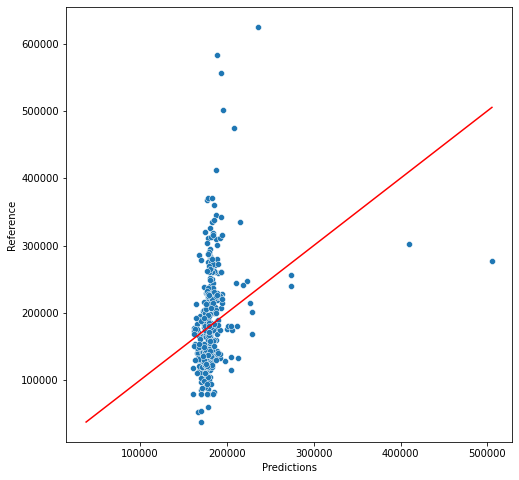

In [12]:
plot_predictions(results.true_values, results.predictions)

* Mean Squared Error (MSE): is calculated as the mean or average of the squared differences between predicted and expected target values.
$$MSE = \frac{1}{n}\sum_{i=1}^{n}(y_{i} - y_{e})^{2}$$

In [13]:
mse_pre = (results
               .assign(diff = lambda x: (x.true_values - x.predictions)**2)
               .agg({'diff':{'sum','count'}}))
mse = mse_pre.loc['sum'] / mse_pre.loc['count']
mse

diff    5.597596e+09
dtype: float64

In [14]:
# check our results with sklearn metrics
mod_res = {}
mod_res['1st_iter'] = {}
from sklearn.metrics import mean_squared_error
mod_res['1st_iter']['mse'] = mean_squared_error(results.true_values, results.predictions)
mod_res['1st_iter']['mse']

5597595963.6921625

* Root Mean Squared Error (RMSE): 
$$RMSE = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(y_{i} - y_{e})^{2}}$$

In [15]:
rmse = (mse_pre.loc['sum'] / mse_pre.loc['count'])**0.5
rmse

diff    74817.083368
dtype: float64

In [16]:
# check our results with sklearn metrics
mod_res['1st_iter']['rmse'] = mean_squared_error(results.true_values, results.predictions)**0.5
mod_res['1st_iter']['rmse']

74817.08336798596

* Mean Absolute Error (MAE)
$$MAE = \frac{1}{n}\sum_{i=1}^{n} |y_{i} - y_{e}|$$

In [17]:
mae_pre = (results
               .assign(diff = lambda x: abs(x.true_values - x.predictions))
               .agg({'diff':{'sum','count'}}))
mod_res['1st_iter']['mae'] = mae_pre.loc['sum'] / mae_pre.loc['count']
mod_res['1st_iter']['mae']

diff    53854.905239
dtype: float64

In [18]:
# check our results with sklearn metrics
from sklearn.metrics import mean_absolute_error
mod_res['1st_iter']['mae'] = mean_absolute_error(results.true_values, results.predictions)
mod_res['1st_iter']['mae']

53854.90523946037

* Mean Absolute Percentage Error (MAPE)

$$MAPE = \frac{1}{n}\sum_{i=1}^{n} |\frac{y_{i} - y_{e}}{y_{i}}|$$

In [19]:
# Given that MAPE (mean absolute percentage error) doesn't exist in this version of sklearn, let's write a function:
def mean_abs_perc_error(y_true, y_pred):
    results = pd.DataFrame({
        'predictions':y_pred,
        'true_values':y_true
    })
    mape_pre = (results
               .assign(diff = lambda x: abs(x.true_values - x.predictions)/x.true_values)
               .agg({'diff':{'sum','count'}}))
    mape = mape_pre.loc['sum'] / mape_pre.loc['count']
    return mape.values[0]

# from sklearn.metrics import mean_absolute_percentage_error
mod_res['1st_iter']['mape'] = mean_abs_perc_error(results['true_values'], results['predictions'])
mod_res['1st_iter']['mape']
mod_res

{'1st_iter': {'mse': 5597595963.6921625,
  'rmse': 74817.08336798596,
  'mae': 53854.90523946037,
  'mape': 0.32430390454063573}}


        MSE: 5597595963.6921625
        RMSE: 74817.08336798596
        MAE: 53854.90523946037
        MAPE: 0.32430390454063573
        
505174.62216070667 160921.49879506417


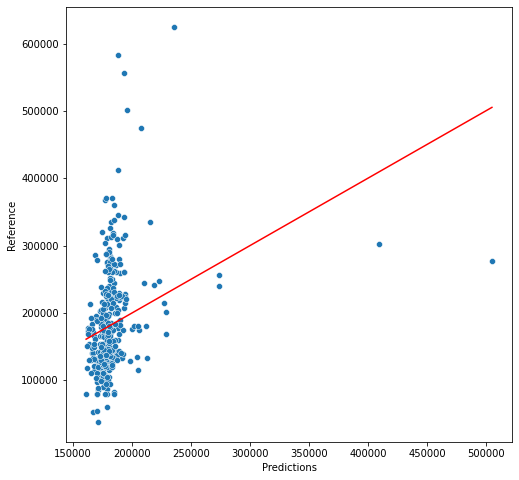

In [20]:
def plot_predictions(y_true, y_pred): 
    print(
        f"""
        MSE: {mean_squared_error(y_true, y_pred)}
        RMSE: {mean_squared_error(y_true, y_pred)**0.5}
        MAE: {mean_absolute_error(y_true, y_pred)}
        MAPE: {mean_abs_perc_error(y_true, y_pred)}
        """
    )
    
    max_preds = min([max(y_pred.tolist()), max(y_true.tolist())])
    min_preds = max([min(y_pred.tolist()), min(y_true.tolist())])
    
    print(max_preds, min_preds)
    # plot
    plt.figure(figsize=(8,8))
    sns.scatterplot(x=y_pred, y=y_true)
    sns.lineplot(x=[min_preds,max_preds], y=[min_preds, max_preds], color='red')
    plt.ylabel('Reference')
    plt.xlabel('Predictions')
    plt.show()

    return {
        'mse': mean_squared_error(y_true, y_pred), 
        'rmse': mean_squared_error(y_true, y_pred)**0.5,
        'mae': mean_absolute_error(y_true, y_pred),
        'mape': mean_abs_perc_error(y_true, y_pred)
    }

mod_res['1st_iter'] = plot_predictions(y_test, results['predictions'])

####Have this errors a normal distribution?

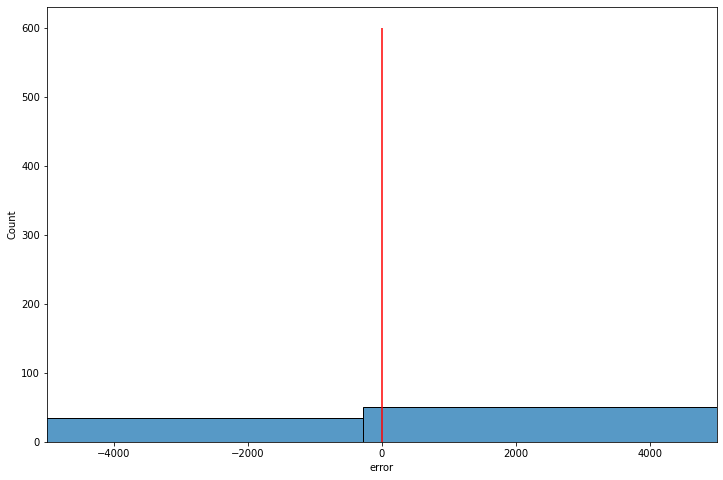

In [21]:
p_df = results.assign(error = lambda x: x['predictions'] - x['true_values'])

plt.subplots(figsize=(12, 8))
sns.histplot(p_df['error'])
plt.vlines(x=0, ymin=0, ymax=600, color='red')
# big problems with outliers
plt.xlim(-5000, 5000)
plt.show()
# skewness to the right, my model tend to predict a higer price then it should be

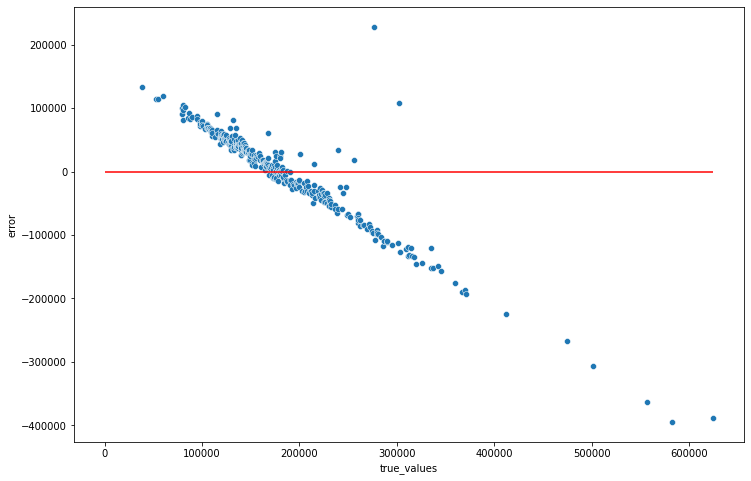

In [22]:
# another way to visualise our errors
p_df = p_df.sort_values(by='true_values')

plt.subplots(figsize=(12, 8))
sns.scatterplot(data=p_df, x='true_values', y='error')
plt.hlines(y=0, xmin=0, xmax=max(p_df['true_values']), color='red')
plt.show()

We can also detect that our model tend to predict worse as the houses get more expensive. Maybe we are missing some kind of qualities there. 

## 2nd iteration: Sklearn pipeline + all features

In [23]:
X_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1446,1447,20,RL,NaN,26142,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
1123,1124,20,RL,50.0,9405,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
186,187,80,RL,NaN,9947,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,GdPrv,NaN,0,6,2009,WD,Normal
1020,1021,20,RL,60.0,7024,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2008,WD,Normal
67,68,20,RL,72.0,10665,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal


Substituting the NaN values for N_A

In [24]:
X_train["MiscFeature"].isna().sum()#.sum()

1055

In [25]:
X_train["MiscFeature"].shape

(1095,)

The feature MiscFeature has 1055 missing value for a total of 1095, so i will drop this column 

In [26]:
X_train.drop(columns="MiscFeature", inplace=True)

In [27]:
X_train["PoolQC"].isna().sum()

1089

The feature PoolQC has 1089 missing value for a total of 1095, so i will also drop this column 

In [28]:
X_train.drop(columns="PoolQC", inplace=True)

###Checking if it has more "empty" columns

In [32]:
X_train.isna().sum().sort_values(ascending=False)

Alley            1023
Fence             886
FireplaceQu       519
LotFrontage       174
GarageType         64
                 ... 
BsmtUnfSF           0
TotalBsmtSF         0
MSSubClass          0
HeatingQC           0
SaleCondition       0
Length: 78, dtype: int64

I will also drop the alley column

In [33]:
X_train.drop(columns="Alley", inplace=True)

I will then use for the other columns a strategy to substitute the NaN values for N_A

In [34]:
X_train.fillna("N_A", inplace=True)

data=data.reshape((0,1095))

In [26]:
len(y_train)

1095

In [36]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

cat_pipeline = Pipeline(steps=[
        ('one_hot_enc', OneHotEncoder(drop='first'))
])
num_pipeline = Pipeline(steps=[
    ('scale', MinMaxScaler())
])

cat_cols = X_train.select_dtypes('category').columns.tolist()
num_cols = X_train.select_dtypes('float').columns.tolist()
full_processor = ColumnTransformer(transformers=[
    ('number', num_pipeline, num_cols), 
    ('category', cat_pipeline, cat_cols)
])

lm_pipeline = Pipeline(steps=[
    ('processor', full_processor), 
    ('model', LinearRegression())
])

_ = lm_pipeline.fit(X_train, y_train)
lm_pipeline

ValueError: ignored